<a href="https://colab.research.google.com/github/MuayThaiLegz/PracticeCrazy/blob/main/Copy_of_Explain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

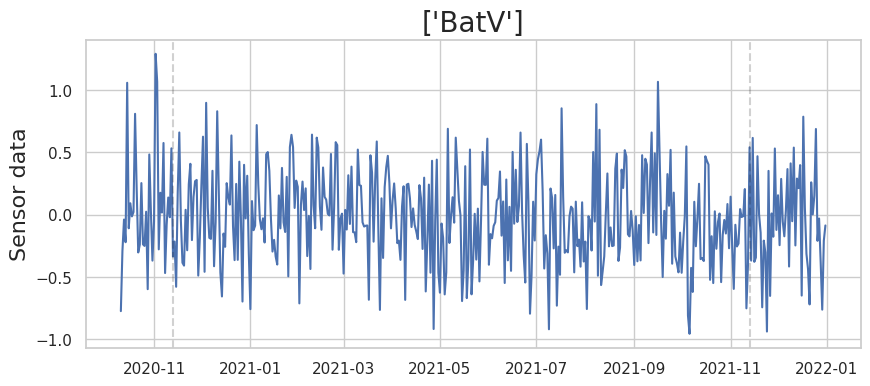

In [328]:
plt.figure(figsize=(10,4))
plt.plot(lim_deviceA_anomaliesMoving)
plt.title(f'{lim_deviceA_anomaliesMoving.columns.tolist()}', fontsize=20)
plt.ylabel('Sensor data', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-11-13'), color='k', linestyle='--', alpha=0.2)

In [329]:

from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.dates as mdates

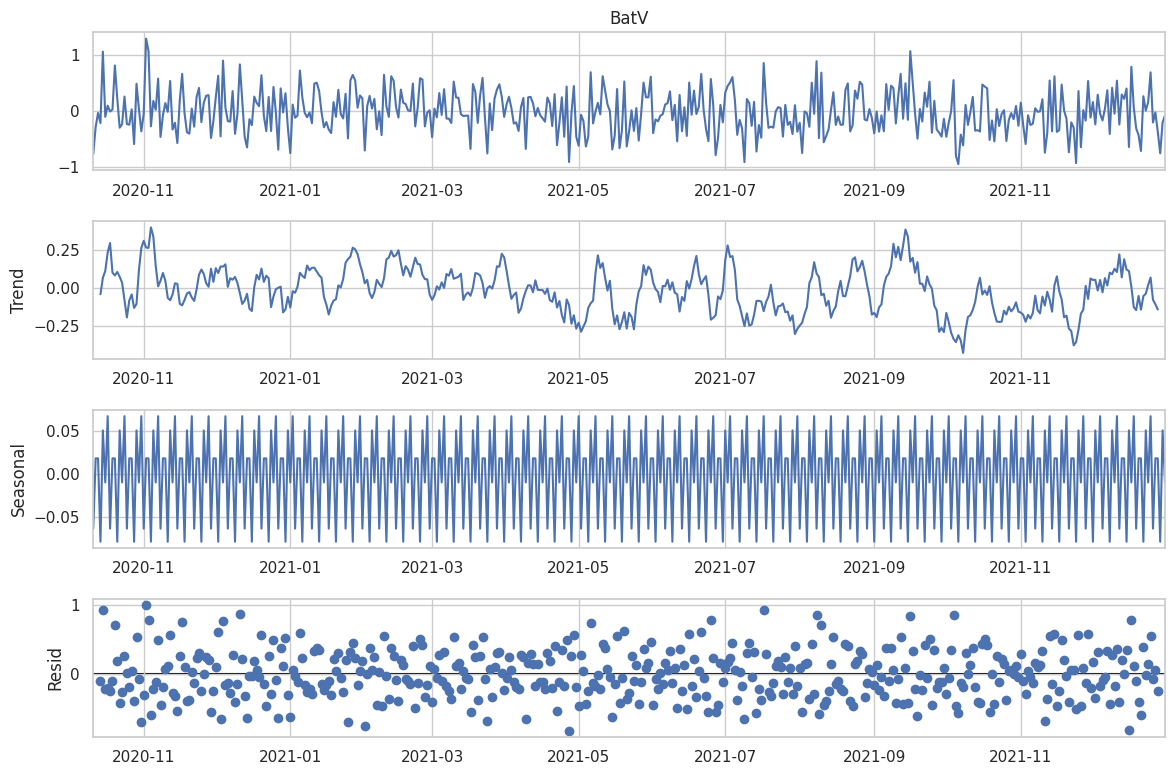

In [331]:
plt.rc('figure',figsize=(12,8))
plt.rc('font',size=15)

result = seasonal_decompose(lim_deviceA_anomaliesMoving['BatV'],model='additive')
fig = result.plot()

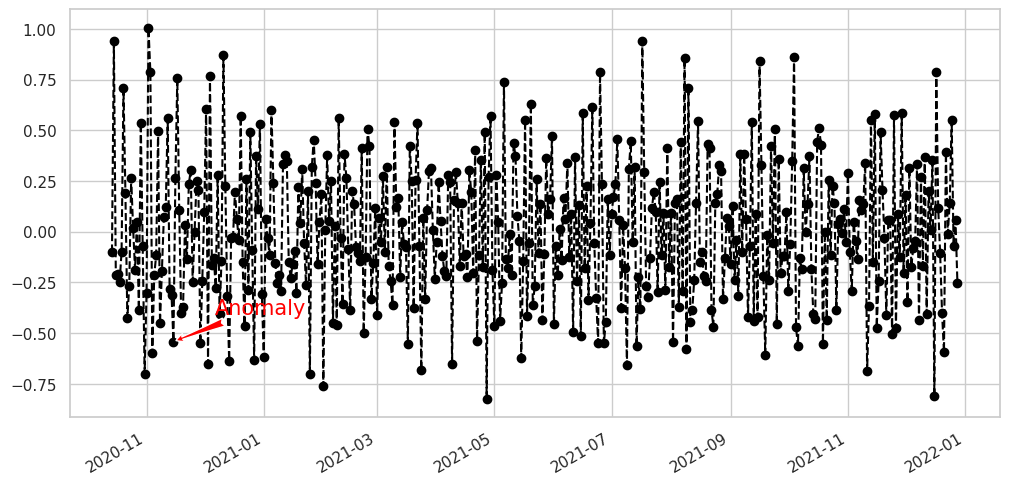

In [332]:

plt.rc('figure',figsize=(12,6))
plt.rc('font',size=15)

fig, ax = plt.subplots()
x = result.resid.index
y = result.resid.values
ax.plot_date(x, y, color='black',linestyle='--')

ax.annotate('Anomaly', (mdates.date2num(x[35]), y[35]), xytext=(30, 20),
           textcoords='offset points', color='red',arrowprops=dict(facecolor='red',arrowstyle='fancy'))

fig.autofmt_xdate()
plt.show()

In [203]:

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest

In [258]:
deviceA_anomaliesMoving.columns

Index(['payload.fCnt', 'BatV', 'Hum_SHT', 'TempC_DS', 'TempC_SHT', 'Autumn', 'Spring', 'Summer', 'Winter', '2020.0', '2021.0', '2022.0', '2023.0', 'BatV_lag_1', 'BatV_lag_2', 'Hum_SHT_lag_1', 'Hum_SHT_lag_2', 'TempC_DS_lag_1', 'TempC_DS_lag_2', 'TempC_SHT_lag_1', 'TempC_SHT_lag_2', 'payload.fCnt_lag_1', 'payload.fCnt_lag_2', 'Hum_SHT_roll_mean', 'Hum_SHT_roll_std', 'TempC_DS_roll_mean', 'TempC_DS_roll_std', 'TempC_SHT_roll_mean', 'TempC_SHT_roll_std', 'BatV_growth', 'Hum_SHT_trend', 'TempC_SHT_trend', 'TempC_DS_trend', 'IsolationForest_Anomaly', 'IsolationForest_AnomalyScore', 'LocalOutlierFactor_Anomaly', 'LocalOutlierFactor_AnomalyScore', 'OneClassSVM_Anomaly', 'OneClassSVM_AnomalyScore', 'Autoencoder_Anomaly', 'Autoencoder_reconstruction_error', 'Final_Anomaly', 'SMAShort', 'SMALong'], dtype='object')

In [237]:
|deviceA_anomaliesMoving.index

DatetimeIndex(['2020-10-11 08:42:18.037069', '2020-10-11 08:42:20.299864', '2020-10-11 08:42:22.210318', '2020-10-11 08:42:24.046075', '2020-10-12 08:42:09.572810', '2020-10-12 08:42:15.525487', '2020-10-12 08:42:18.037069', '2020-10-12 08:42:20.299864', '2020-10-12 08:42:22.210318', '2020-10-12 08:42:24.046075',
               ...
               '2023-07-06 08:42:09.604856', '2023-07-06 08:42:15.553490', '2023-07-06 08:42:18.069065', '2023-07-06 08:42:20.873534', '2023-07-06 08:42:22.233907', '2023-07-07 08:42:09.604856', '2023-07-07 08:42:15.553490', '2023-07-07 08:42:18.069065', '2023-07-07 08:42:20.873534', '2023-07-07 08:42:22.233907'], dtype='datetime64[ns]', name='payload.publishedAt', length=5469, freq=None)

In [277]:
start_date = datetime(2020,10,11)
end_date = datetime(2023,7,7)

lim_deviceA_anomaliesMoving = deviceA_anomaliesMoving[start_date:end_date][['BatV','LocalOutlierFactor_Anomaly', 'LocalOutlierFactor_AnomalyScore']].resample('W').mean()

In [278]:
lim_deviceA_anomaliesMoving

,BatV,LocalOutlierFactor_Anomaly,LocalOutlierFactor_AnomalyScore
payload.publishedAt,,,
2020-10-11,-0.772915,0.000000,-1.043502
2020-10-18,0.068766,0.023810,-1.042526
2020-10-25,0.074904,0.000000,-1.030340
2020-11-01,-0.103576,0.000000,-1.037195
2020-11-08,0.340657,0.142857,-1.071210
...,...,...,...
2023-06-11,0.170031,0.000000,-1.037447
2023-06-18,-0.024125,0.085714,-1.049769
2023-06-25,0.039145,0.000000,-1.040579


In [296]:
lim_deviceA_anomaliesMoving['BatV'].iloc[[15]] = 1.87
lim_deviceA_anomaliesMoving['BatV'].iloc[[54]] = lim_deviceA_anomaliesMoving['BatV'].iloc[[54]] + 1.95000

In [297]:
lim_deviceA_anomaliesMoving.iloc[[54]]['BatV']

payload.publishedAt
2021-10-24    1.786852
Freq: W-SUN, Name: BatV, dtype: float64

<Axes: xlabel='payload.publishedAt'>

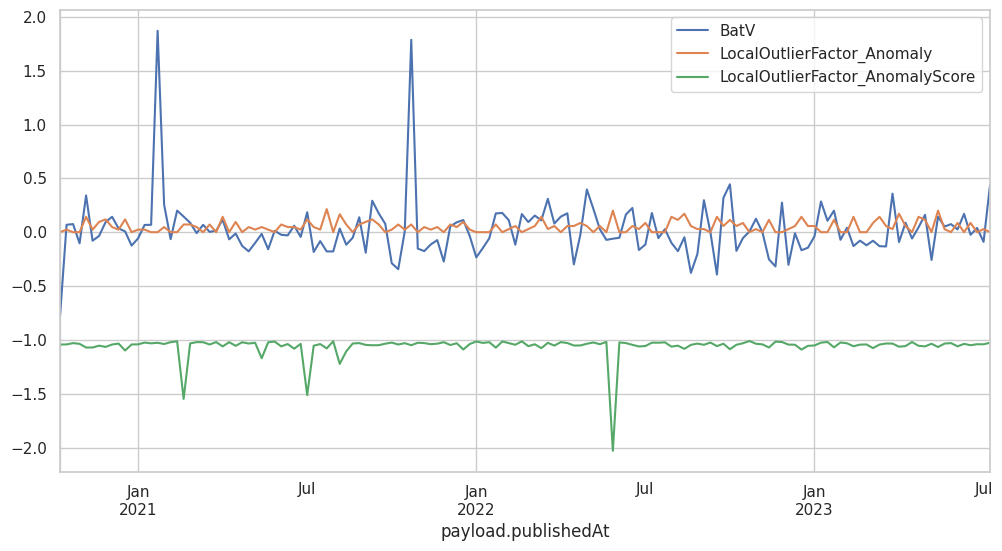

In [299]:
plt.rc('figure',figsize=(12,6))
plt.rc('font',size=15)
lim_deviceA_anomaliesMoving.plot()

In [304]:
lim_deviceA_anomaliesMoving['LocalOutlierFactor_Anomaly']


payload.publishedAt
2020-10-11    0.000000
2020-10-18    0.023810
2020-10-25    0.000000
2020-11-01    0.000000
2020-11-08    0.142857
                ...   
2023-06-11    0.000000
2023-06-18    0.085714
2023-06-25    0.000000
2023-07-02    0.028571
2023-07-09    0.000000
Freq: W-SUN, Name: LocalOutlierFactor_Anomaly, Length: 144, dtype: float64

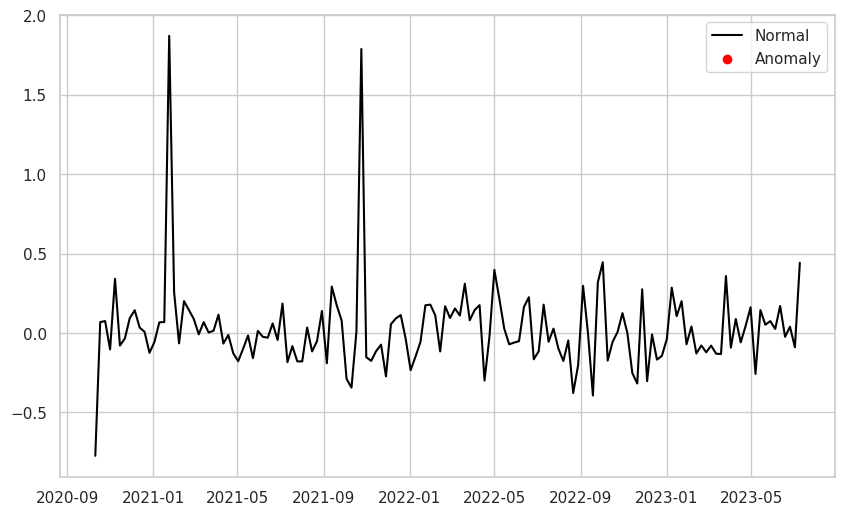

In [303]:

# visualization
fig, ax = plt.subplots(figsize=(10,6))

a = lim_deviceA_anomaliesMoving.loc[lim_deviceA_anomaliesMoving['LocalOutlierFactor_Anomaly'] == 1, ['BatV']] #anomaly

ax.plot(lim_deviceA_anomaliesMoving.index, lim_deviceA_anomaliesMoving['BatV'], color='black', label = 'Normal')
ax.scatter(a.index,a['BatV'], color='red', label = 'Anomaly')
plt.legend()
plt.show();

In [ ]:

# train_end = beforethat.iloc[-1]
# test_end = dffree.iloc[-1]
traindf = traindf.select_dtypes(np.number)#[['BatV']]
testdf = testdf.select_dtypes(np.number)#[['BatV']]
filldf = dffree.select_dtypes(np.number)#[['BatV']]
train = traindf[:1000]
validate = traindf[1000:1500]
test = traindf[1500:]
train_end = train.index[-1]
test_end = test.index[-1]

test_data = traindf[train_end + timedelta(days=1):test_end]

test_data

In [117]:
traindfNum

,BatV,SMAShort,SMALong
payload.publishedAt,,,
2020-11-13 08:42:20.300865,-1.064597,0.065445,0.060900
2020-11-13 08:42:22.211316,1.520056,0.064949,0.069378
2020-11-13 08:42:24.047074,0.627657,0.128574,0.076336
2020-11-14 08:42:09.573810,-0.654754,0.095357,0.076765
2020-11-14 08:42:15.526486,-0.188723,0.011240,0.082880
...,...,...,...
2023-07-07 08:42:09.604856,0.964785,0.547010,0.075509
2023-07-07 08:42:15.553490,1.612601,0.635920,0.080864
2023-07-07 08:42:18.069065,0.981311,0.643356,0.084830


In [70]:
# Make sure you have installed the Plotly library
# !pip install plotly

import plotly.graph_objects as go


traindfNum["AbnormalLevels"] = 0.0
position = False

for i in range(1, len(traindfNum)):

    if traindfNum["SMAShort"][i] > traindfNum["SMALong"][i] and not position:
        traindfNum["AbnormalLevels"][i] = 1.0
        position = True

    elif traindfNum["SMAShort"][i] < traindfNum["SMALong"][i] and position:
        traindfNum["AbnormalLevels"][i] = -1.0
        position = False

fig = go.Figure()

# Plot BatV
fig.add_trace(go.Scatter(
    x=traindfNum.index,
    y=traindfNum['BatV'],
    mode='lines',
    name='BatV',
    line=dict(color='black'),
))

# Plot SMAShort
fig.add_trace(go.Scatter(
    x=traindfNum.index,
    y=traindfNum['SMAShort'],
    mode='lines',
    name='SMAShort'
))

# Plot SMALong
fig.add_trace(go.Scatter(
    x=traindfNum.index,
    y=traindfNum['SMALong'],
    mode='lines',
    name='SMALong'
))

# Plot Entry Points
fig.add_trace(go.Scatter(
    x=traindfNum[traindfNum['AbnormalLevels'] == 1.0].index,
    y=traindfNum[traindfNum['AbnormalLevels'] == 1.0]['BatV'],
    mode='markers',
    name='Entry Points',
    marker=dict(color='purple', symbol='triangle-up', size=10)
))

# Plot Exit Points
fig.add_trace(go.Scatter(
    x=traindfNum[traindfNum['AbnormalLevels'] == -1.0].index,
    y=traindfNum[traindfNum['AbnormalLevels'] == -1.0]['BatV'],
    mode='markers',
    name='Exit Points',
    marker=dict(color='yellow', symbol='triangle-down', size=10)
))

# Update layout
fig.update_layout(
    title='RF - SMA20, SMA50, Low and High Points',
    xaxis_title='Time',
    yaxis_title='Value',
)

# Show plot
fig.show()


In [71]:
traindfNum["AbnormalLevels"].value_counts()

 0.0    4780
 1.0     345
-1.0     344
Name: AbnormalLevels, dtype: int64

In [ ]:
# # Make sure you have installed the Plotly library
# # !pip install plotly

# import plotly.graph_objects as go

# traindfNum = catfish_sales
# traindfNum.rename(columns={'BatVSMAShort':'SMAShort'}, inplace=True)
# traindfNum.rename(columns={'BatVSMALong':'SMALong'}, inplace=True)
# traindfNum["AbnormalLevels"] = 0.0
# position = False

# for i in range(1, len(traindfNum)):

#     if traindfNum["SMAShort"][i] > traindfNum["SMALong"][i] and not position:
#         traindfNum["AbnormalLevels"][i] = 1.0
#         position = True

#     elif traindfNum["SMAShort"][i] < traindfNum["SMALong"][i] and position:
#         traindfNum["AbnormalLevels"][i] = -1.0
#         position = False

# fig = go.Figure()

# # Plot BatV
# fig.add_trace(go.Scatter(
#     x=traindfNum.index,
#     y=traindfNum['BatV'],
#     mode='lines',
#     name='BatV',
#     line=dict(color='black'),
# ))

# # Plot SMAShort
# fig.add_trace(go.Scatter(
#     x=traindfNum.index,
#     y=traindfNum['SMAShort'],
#     mode='lines',
#     name='SMAShort'
# ))

# # Plot SMALong
# fig.add_trace(go.Scatter(
#     x=traindfNum.index,
#     y=traindfNum['SMALong'],
#     mode='lines',
#     name='SMALong'
# ))

# # Plot Entry Points
# fig.add_trace(go.Scatter(
#     x=traindfNum[traindfNum['AbnormalLevels'] == 1.0].index,
#     y=traindfNum[traindfNum['AbnormalLevels'] == 1.0]['BatV'],
#     mode='markers',
#     name='Entry Points',
#     marker=dict(color='purple', symbol='triangle-up', size=10)
# ))

# # Plot Exit Points
# fig.add_trace(go.Scatter(
#     x=traindfNum[traindfNum['AbnormalLevels'] == -1.0].index,
#     y=traindfNum[traindfNum['AbnormalLevels'] == -1.0]['BatV'],
#     mode='markers',
#     name='Exit Points',
#     marker=dict(color='yellow', symbol='triangle-down', size=10)
# ))

# # Update layout
# fig.update_layout(
#     title='RF - SMA20, SMA50, Low and High Points',
#     xaxis_title='Time',
#     yaxis_title='Value',
# )



In [ ]:
# for s in ['Fall', 'Spring', 'Summer', 'Winter']:
#     display(traindf.groupby([s, 'Final_Anomaly']).agg(['mean', 'sum', 'count', 'size']))

In [ ]:
# # Make sure you have installed the Plotly library
# # !pip install plotly

# import plotly.graph_objects as go


# traindfNum["AbnormalLevels"] = 0.0
# position = False

# for i in range(1, len(traindfNum)):

#     if traindfNum["SMAShort"][i] > traindfNum["SMALong"][i] and not position:
#         traindfNum["AbnormalLevels"][i] = 1.0
#         position = True

#     elif traindfNum["SMAShort"][i] < traindfNum["SMALong"][i] and position:
#         traindfNum["AbnormalLevels"][i] = -1.0
#         position = False

# fig = go.Figure()

# # Plot BatV
# fig.add_trace(go.Scatter(
#     x=traindfNum.index,
#     y=traindfNum['BatV'],
#     mode='lines',
#     name='BatV',
#     line=dict(color='black'),
# ))

# # Plot SMAShort
# fig.add_trace(go.Scatter(
#     x=traindfNum.index,
#     y=traindfNum['SMAShort'],
#     mode='lines',
#     name='SMAShort'
# ))

# # Plot SMALong
# fig.add_trace(go.Scatter(
#     x=traindfNum.index,
#     y=traindfNum['SMALong'],
#     mode='lines',
#     name='SMALong'
# ))

# # Plot Entry Points
# fig.add_trace(go.Scatter(
#     x=traindfNum[traindfNum['AbnormalLevels'] == 1.0].index,
#     y=traindfNum[traindfNum['AbnormalLevels'] == 1.0]['BatV'],
#     mode='markers',
#     name='Entry Points',
#     marker=dict(color='purple', symbol='triangle-up', size=10)
# ))

# # Plot Exit Points
# fig.add_trace(go.Scatter(
#     x=traindfNum[traindfNum['AbnormalLevels'] == -1.0].index,
#     y=traindfNum[traindfNum['AbnormalLevels'] == -1.0]['BatV'],
#     mode='markers',
#     name='Exit Points',
#     marker=dict(color='yellow', symbol='triangle-down', size=10)
# ))

# # Update layout
# fig.update_layout(
#     title='RF - SMA20, SMA50, Low and High Points',
#     xaxis_title='Time',
#     yaxis_title='Value',
# )

# # Show plot
# fig.show()


In [ ]:

result = seasonal_decompose(x=traindata['Hum_SHT'], model='additive')
fig = result.plot()


plt.rc('figure',figsize=(12,6))
plt.rc('font',size=15)

fig, ax = plt.subplots()
x = result.resid.index
y = result.resid.values
ax.plot_date(x, y, color='black',linestyle='--')

ax.annotate('Anomaly', (mdates.date2num(x[20]), y[45]), xytext=(30, 20),
           textcoords='offset points', color='red',arrowprops=dict(facecolor='red',arrowstyle='fancy'))

ax.annotate('Anomaly', (mdates.date2num(x[25]), y[30]), xytext=(30, 20),
           textcoords='offset points', color='red',arrowprops=dict(facecolor='red',arrowstyle='fancy'))


fig.autofmt_xdate()
plt.show()

In [ ]:
data = deviceA_anomalies_sample
n_cluster = range(1, 20)
kmeans = [KMeans(n_clusters=i).fit(data) for i in n_cluster]
scores = [kmeans[i].score(data) for i in range(len(kmeans))]

km = KMeans(n_clusters=10)
km.fit(data)
km.predict(data)
labels = km.labels_
# #Plotting
fig,ax = plt.subplots(figsize=(10,6))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(data.iloc[:,0], data.iloc[:,1], data.iloc[:,2],
          c=labels.astype(np.float), edgecolor="k")
ax.set_xlabel("price_usd")
ax.set_ylabel("srch_booking_window")
ax.set_zlabel("srch_saturday_night_bool")
plt.title("K Means", fontsize=14)
plt.show();



In [ ]:
Anomaly = ['IsolationForest_Anomaly',"Autoencoder_Anomaly","OneClassSVM_Anomaly","LocalOutlierFactor_Anomaly",'Final_Anomaly']

solo = ["BatV","Hum_SHT","TempC_DS",'TempC_SHT']
trainanomalies = traindata[[solo[2], Anomaly[-1]]]

# visualization
fig, ax = plt.subplots(figsize=(10,6))

a = trainanomalies.loc[trainanomalies['Final_Anomaly'] == 1, ['TempC_DS']] #anomaly

ax.plot(trainanomalies.index, trainanomalies['TempC_DS'], color='black', label = 'Normal')
ax.scatter(a.index,a['TempC_DS'], color='red', label = 'Anomaly')
plt.legend()
plt.show();# visualization

